Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6115 - loss: 0.6959 - val_accuracy: 0.6162 - val_loss: 0.6464
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6263 - loss: 0.6334 - val_accuracy: 0.6806 - val_loss: 0.5780
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.5924 - val_accuracy: 0.6856 - val_loss: 0.5690
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6859 - loss: 0.5734 - val_accuracy: 0.7163 - val_loss: 0.5470
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7149 - loss: 0.5409 - val_accuracy: 0.6950 - val_loss: 0.5743
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6917 - loss: 0.5687 - val_accuracy: 0.7256 - val_loss: 0.5356
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7246 - loss: 0.5432 - val_accuracy: 0.7431 - val_loss: 0.5123
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7426 - loss: 0.5164 - val_accuracy: 0.7306

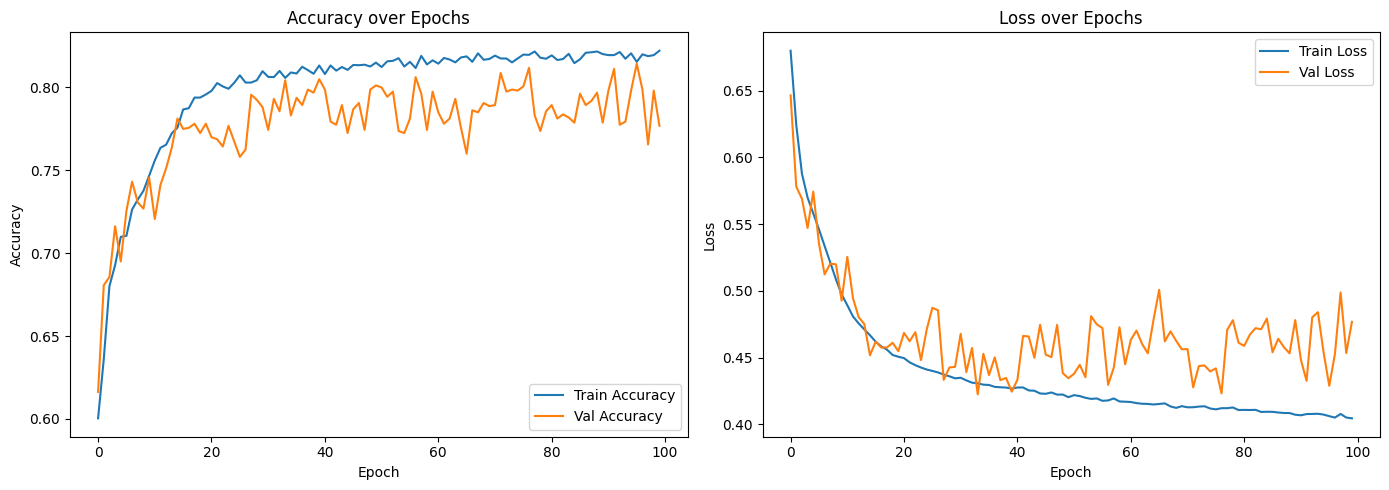

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1607
           1       0.46      0.76      0.57       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.77      0.79      2000



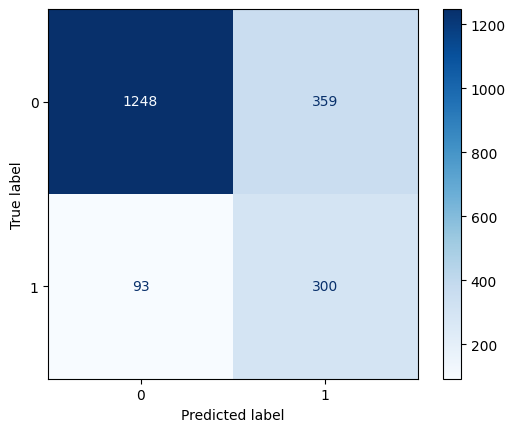

In [62]:
# 1. Importing Stuff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# 2. Loadin' it
df = pd.read_csv("/content/archive (8).zip")

# 3. Drop no-use cols
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# 4. Encoding
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# 5. X,y
X = df.drop('Exited', axis=1)
y = df['Exited']

# 6. Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. The data is imbalanced...so we will need class weights
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}

# 9. ANN Model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 10. Compiling
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 11. Training
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2,
                    class_weight=class_weights,
                    verbose=1)

# 12. Evaluating
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# 13. Plotting Acc and Loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 14. Predicting
y_pred = model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int)

# 15. Cm and Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
